In [4]:
import warnings

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

import spacy

data=pd.read_csv('./drive/MyDrive/dataset/dataset_phishing.csv')
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data.shape

(11430, 89)

In [7]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [8]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [9]:
#Encoding 'status' as label 1 & 0 , naming the field as target
data['target'] = pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status',axis = 1, inplace=True)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [10]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('target')
X = data.drop(columns=['url','target'])


X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

X_train.to_csv('x_training.csv', sep='\t')
y_train.to_csv('y_training.csv', sep='\t')
X_valid.to_csv('x_testing.csv', sep='\t')
y_valid.to_csv('y_testing.csv', sep='\t')


input_shape = [X_train.shape[1]]

X_train.shape
X_valid.shape


(2858, 87)

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

def fit_model(x_train,y_train):
  # model = keras.Sequential([
  #     layers.BatchNormalization(input_shape=input_shape),
  #     layers.Dense(512, activation='relu'),
  #     layers.Dense(512, activation='relu'),
  #     layers.BatchNormalization(),
  #     layers.Dropout(0.3),
  #     layers.Dense(512, activation='relu'),
  #     layers.Dense(512, activation='relu'),
  #     layers.BatchNormalization(),
  #     layers.Dropout(0.3),
  #     layers.Dense(1, activation='sigmoid'),
  # ])
  model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
  model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
  return model




In [13]:
import os
os.makedirs('models')

In [37]:
n_members = 5
for i in range(n_members):
	# fit model
	model = fit_model(X_train, y_train)
  execute(model)
	# save model
	filename = 'models/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)

Epoch 1/100
34/34 [==============================] - 2s 28ms/step - loss: 0.2442 - binary_accuracy: 0.9098 - val_loss: 0.3919 - val_binary_accuracy: 0.8167
Epoch 2/100
34/34 [==============================] - 1s 23ms/step - loss: 0.1445 - binary_accuracy: 0.9490 - val_loss: 0.2932 - val_binary_accuracy: 0.8905
Epoch 3/100
34/34 [==============================] - 1s 23ms/step - loss: 0.1201 - binary_accuracy: 0.9552 - val_loss: 0.2513 - val_binary_accuracy: 0.9115
Epoch 4/100
34/34 [==============================] - 1s 24ms/step - loss: 0.1052 - binary_accuracy: 0.9629 - val_loss: 0.1830 - val_binary_accuracy: 0.9416
Epoch 5/100
34/34 [==============================] - 1s 24ms/step - loss: 0.0925 - binary_accuracy: 0.9649 - val_loss: 0.1485 - val_binary_accuracy: 0.9542
Epoch 6/100
34/34 [==============================] - 1s 23ms/step - loss: 0.0881 - binary_accuracy: 0.9678 - val_loss: 0.1350 - val_binary_accuracy: 0.9524
Epoch 7/100
34/34 [==============================] - 1s 23ms/ste

In [38]:
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = keras.models.load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [39]:
from tensorflow import keras
# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))


>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models


In [35]:

# evaluate standalone models on test dataset
for model in members:
	_, acc = model.evaluate(X_valid, y_valid, verbose=0)
	print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.959
Model Accuracy: 0.958
Model Accuracy: 0.959
Model Accuracy: 0.956
Model Accuracy: 0.962


In [64]:
import numpy as np
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		yhat = model.predict(inputX, verbose=0)
		if stackX is None:
			stackX = yhat
		else:
			stackX = np.dstack((stackX, yhat))
	stackX = stackX.reshape((stackX.shape[0], 87))
	return stackX

In [65]:
def fit_stacked_model(members, inputX, inputy):
	stackedX = stacked_dataset(members, inputX)
	model = fit_model(inputX,inputy)
	model.fit(stackedX, inputy)
	return model

In [ ]:
model = fit_stacked_model(members, X_valid, y_valid)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 87)               348       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 512)               45056     
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)              

In [25]:
def execute(model):
  early_stopping = keras.callbacks.EarlyStopping(
      patience=20,
      min_delta=0.01,
      restore_best_weights=True,
  )
  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=256,
      epochs=100,
      callbacks=[early_stopping],
  )

Epoch 1/100
268/268 [==============================] - 4s 8ms/step - loss: 0.2259 - binary_accuracy: 0.9175 - val_loss: 0.1506 - val_binary_accuracy: 0.9475
Epoch 2/100
268/268 [==============================] - 2s 7ms/step - loss: 0.1508 - binary_accuracy: 0.9442 - val_loss: 0.1532 - val_binary_accuracy: 0.9524
Epoch 3/100
268/268 [==============================] - 2s 7ms/step - loss: 0.1365 - binary_accuracy: 0.9509 - val_loss: 0.1532 - val_binary_accuracy: 0.9479
Epoch 4/100
268/268 [==============================] - 2s 8ms/step - loss: 0.1233 - binary_accuracy: 0.9552 - val_loss: 0.1510 - val_binary_accuracy: 0.9510
Epoch 5/100
268/268 [==============================] - 2s 8ms/step - loss: 0.1144 - binary_accuracy: 0.9568 - val_loss: 0.1604 - val_binary_accuracy: 0.9524
Epoch 6/100
268/268 [==============================] - 2s 7ms/step - loss: 0.1164 - binary_accuracy: 0.9573 - val_loss: 0.1503 - val_binary_accuracy: 0.9545
Epoch 7/100
268/268 [==============================] - 2s 

In [ ]:
model.evaluate(X_valid, y_valid)

90/90 [==============================] - 0s 3ms/step - loss: 0.1650 - binary_accuracy: 0.9647


[0.16500478982925415, 0.9646605849266052]

In [ ]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

execute()

Epoch 1/200
34/34 [==============================] - 1s 12ms/step - loss: 0.4326 - binary_accuracy: 0.8052 - val_loss: 0.6082 - val_binary_accuracy: 0.7750
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 0.2496 - binary_accuracy: 0.9018 - val_loss: 0.5548 - val_binary_accuracy: 0.7404
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 0.2051 - binary_accuracy: 0.9217 - val_loss: 0.5230 - val_binary_accuracy: 0.6854
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 0.1897 - binary_accuracy: 0.9304 - val_loss: 0.4793 - val_binary_accuracy: 0.7061
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 0.1728 - binary_accuracy: 0.9307 - val_loss: 0.4253 - val_binary_accuracy: 0.7621
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 0.1660 - binary_accuracy: 0.9368 - val_loss: 0.3667 - val_binary_accuracy: 0.8310
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - lo

In [ ]:
model.compile(
    optimizer='ftrl',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
execute()

Epoch 1/50
17/17 [==============================] - 2s 26ms/step - loss: 0.6541 - binary_accuracy: 0.5236 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6931 - binary_accuracy: 0.4921 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6931 - binary_accuracy: 0.4988 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6931 - binary_accuracy: 0.4939 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6931 - binary_accuracy: 0.4909 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6931 - binary_accuracy: 0.4949 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 7/50
17/17 [==============================] - 0s 11ms/step - los

In [ ]:
model.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

execute()

Epoch 1/50
17/17 [==============================] - 2s 26ms/step - loss: 0.6932 - binary_accuracy: 0.5005 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6932 - binary_accuracy: 0.4960 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6932 - binary_accuracy: 0.5014 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6932 - binary_accuracy: 0.4995 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/50
17/17 [==============================] - 0s 11ms/step - loss: 0.6932 - binary_accuracy: 0.4988 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6932 - binary_accuracy: 0.4949 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 7/50
17/17 [==============================] - 0s 12ms/step - los

In [ ]:
model.compile(
    optimizer='Nadam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

execute()

Epoch 1/50
17/17 [==============================] - 3s 31ms/step - loss: 0.6932 - binary_accuracy: 0.4956 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 0s 13ms/step - loss: 0.6932 - binary_accuracy: 0.4918 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/50
17/17 [==============================] - 0s 13ms/step - loss: 0.6932 - binary_accuracy: 0.4932 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6932 - binary_accuracy: 0.4963 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/50
17/17 [==============================] - 0s 14ms/step - loss: 0.6932 - binary_accuracy: 0.4992 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 0s 13ms/step - loss: 0.6932 - binary_accuracy: 0.4999 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 7/50
17/17 [==============================] - 0s 16ms/step - los

Best Validation Loss: 0.0513
Best Validation Accuracy: 0.9899


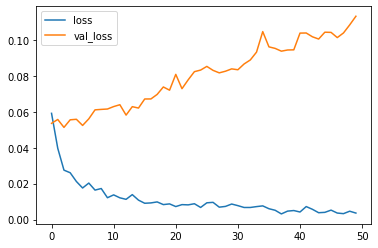

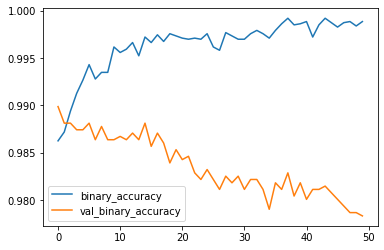

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))